# 1.1 Install scikit-learn & required libraries
This project require numpy, pandas, matplotlib,... and scikit-learn be installed. Run the following code to install the requirements.

In [53]:
!python -m pip install -upgrade scikit-learn
!python -m pip show scikit-learn
!python -c "import sklearn; sklearn.show_versions()"
!python -m pip install matplotlib
!python -m pip install ucimlrepo
!python -m pip install pydotplus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz
from ucimlrepo import fetch_ucirepo
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


Usage:   
  c:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\DELL\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1.2 Download the datasets

In [54]:
# fetch dataset
statlog_german_credit = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
features = statlog_german_credit.data.features
targets = statlog_german_credit.data.targets

In [55]:
# features.dtypes

# One-hot Encoding and Binary Encoding
Encode the categorical data types using one-hot encoding. For example: a variable has three values: high, low, med.<br>
So if an example has buying = low, then the data is displayed as (high = False, low = True, med = False)

In [56]:
features_encoded = pd.get_dummies(features, columns=['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
                                                     'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 
                                                     'Attribute15', 'Attribute17', ])
features_encoded.head()

Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0           6        1169           4            4           67            2   
1          48        5951           2            2           22            1   
2          12        2096           2            3           49            1   
3          42        7882           2            4           45            1   
4          24        4870           3            4           53            2   

   Attribute18 Attribute19 Attribute20  Attribute1_A11  ...  Attribute14_A141  \
0            1        A192        A201            True  ...             False   
1            1        A191        A201           False  ...             False   
2            2        A191        A201           False  ...             False   
3            2        A191        A201            True  ...             False   
4            2        A191        A201            True  ...             False   

   Attribute14_A142  Attribute14_A143  Attribute15_A151  Attribute15_A152  \
0             False              True             False              True   
1             False              True             False              True   
2             False              True             False              True   
3             False              True             False             False   
4             False              True             False             False   

   Attribute15_A153  Attribute17_A171  Attribute17_A172  Attribute17_A173  \
0             False             False             False              True   
1             False             False             False              True   
2             False             False              True             False   
3              True             False             False              True   
4              True             False             False              True   

   Attribute17_A174  
0             False  
1             False  
2             False  
3             False  
4             False  

[5 rows x 59 columns]

Transform the binary data into two integers only. In the features part, only attribute 19 and 20 are binary.<br>
Target 'class' is also binary, but its data type is already integer, so no binary-encoding needed.

In [57]:
# Encode attribute 19
for i in range(len(features_encoded['Attribute19'])):
    if features_encoded['Attribute19'][i] == 'A191':
        features_encoded['Attribute19'][i] = 0
    elif features_encoded['Attribute19'][i] == 'A192':
        features_encoded['Attribute19'][i] = 1

# Encode attribute 20
for i in range(len(features_encoded['Attribute20'])):
    if features_encoded['Attribute20'][i] == 'A201':
        features_encoded['Attribute20'][i] = 1
    elif features_encoded['Attribute20'][i] == 'A202':
        features_encoded['Attribute20'][i] = 0

# targets['class'].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11924\3043181981.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  features_encoded['Attribute19'][i] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_11924\3043181981.py:6: SettingWithCopyWarning: 

# Define a function for spliting the train/test data with a test ratio

In [58]:
# The training and testing dataset will be global 
feature_train = None
feature_test = None
label_train = None
label_test = None
def split_train_test(ratio):
    global feature_train, feature_test, label_train, label_test
    # Split in a stratified fashion
    feature_train, feature_test, label_train, label_test = train_test_split(features_encoded, targets, test_size = ratio,
																		    random_state = 42, stratify = targets)
    # return (feature_train, feature_test, label_train, label_test)

# Define a function for building & visualizing decision tree with training models

In [59]:
def build_id3(filename, maxd):
    # Using information gain as the criteria for the decision tree
    id3 = DecisionTreeClassifier(criterion='entropy', max_depth=maxd, random_state=42)

    # fit the model into the decision tree
    id3 = id3.fit(feature_train, label_train)

    if filename != None:
        tree_img = StringIO()

        # Use graphviz to create a png image of the tree
        export_graphviz(id3, out_file=tree_img, filled=True, rounded=True, special_characters=True, 
                        feature_names = features_encoded.columns, class_names=["Good", "Bad"])

        graph = pydotplus.graph_from_dot_data(tree_img.getvalue())
        graph.write_png(filename)

    return id3

# Define a function for confusion matrix and classification report

In [60]:
def evaluate(id3, print_data):
    # Make predictions
    predictions = id3.predict(feature_test)

    if print_data == True:
        # Create a confusion matrix based on label test and predictions
        cfmx = confusion_matrix(label_test, predictions, labels=id3.classes_)
        cfmx_display = ConfusionMatrixDisplay(confusion_matrix=cfmx, display_labels=id3.classes_)
        print("Confusion matrix!")
        cfmx_display.plot()
        # Print a classification report
        print("Classification report!")
        print(classification_report(label_test, predictions))
    return predictions

# 40/60 ratio for train/test


(process:21588): Pango-CRITICAL **: 23:09:13.431: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:21588): Pango-CRITICAL **: 23:09:13.432: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:21588): Pango-CRITICAL **: 23:09:13.432: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:21588): Pango-CRITICAL **: 23:09:13.432: pango_font_description_get_family: assertion 'desc != NULL' failed

Confusion matrix!
Classification report!
              precision    recall  f1-score   support

           1       0.78      0.75      0.77       420
           2       0.46      0.50      0.48       180

    accuracy                           0.68       600
   macro avg       0.62      0.63      0.62       600
weighted avg       0.68      0.68      0.68       600



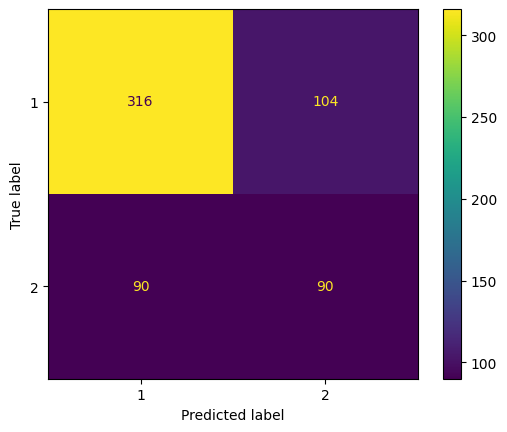

In [61]:
split_train_test(0.6)
id3_40_60 = build_id3('statlog_40_60.png', None)
pred_40_60 = evaluate(id3_40_60, True)

# 60/40 ratio for train/test


(process:17704): Pango-CRITICAL **: 23:09:17.689: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17704): Pango-CRITICAL **: 23:09:17.689: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17704): Pango-CRITICAL **: 23:09:17.689: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:17704): Pango-CRITICAL **: 23:09:17.689: pango_font_description_get_family: assertion 'desc != NULL' failed

Confusion matrix!
Classification report!
              precision    recall  f1-score   support

           1       0.76      0.74      0.75       280
           2       0.43      0.46      0.44       120

    accuracy                           0.66       400
   macro avg       0.60      0.60      0.60       400
weighted avg       0.66      0.66      0.66       400



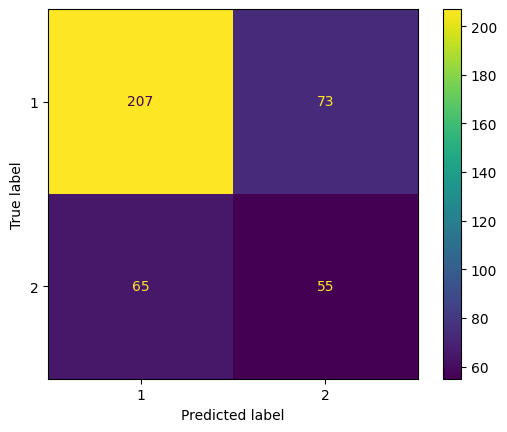

In [62]:
split_train_test(0.4)
id3_60_40 = build_id3('statlog_60_40.png', None)
pred_60_40 = evaluate(id3_60_40, True)

# 80/20 ratio for train/test


(process:12108): Pango-CRITICAL **: 23:09:22.971: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12108): Pango-CRITICAL **: 23:09:22.971: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12108): Pango-CRITICAL **: 23:09:22.971: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:12108): Pango-CRITICAL **: 23:09:22.971: pango_font_description_get_family: assertion 'desc != NULL' failed

Confusion matrix!
Classification report!
              precision    recall  f1-score   support

           1       0.76      0.76      0.76       140
           2       0.45      0.45      0.45        60

    accuracy                           0.67       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.67      0.67      0.67       200



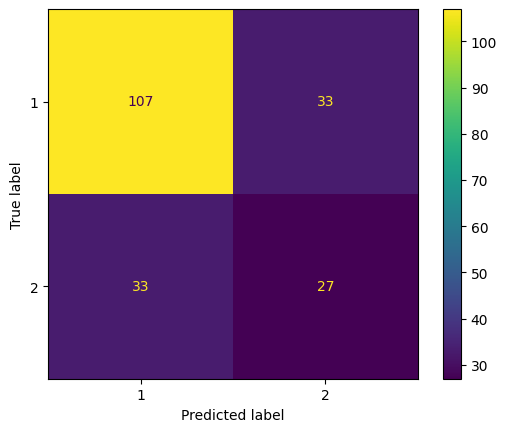

In [63]:
split_train_test(0.2)
id3_80_20 = build_id3('statlog_80_20.png', None)
pred_80_20 = evaluate(id3_80_20, True)

# 90/10 ratio for train/test


(process:5316): Pango-CRITICAL **: 23:09:29.265: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5316): Pango-CRITICAL **: 23:09:29.265: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5316): Pango-CRITICAL **: 23:09:29.265: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:5316): Pango-CRITICAL **: 23:09:29.265: pango_font_description_get_family: assertion 'desc != NULL' failed

Confusion matrix!
Classification report!
              precision    recall  f1-score   support

           1       0.76      0.80      0.78        70
           2       0.46      0.40      0.43        30

    accuracy                           0.68       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.67      0.68      0.67       100



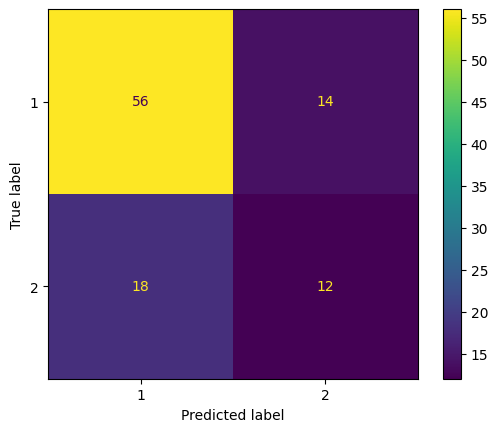

In [64]:
split_train_test(0.1)
id3_90_10 = build_id3('statlog_90_10.png', None)
pred_90_10 = evaluate(id3_90_10, True)

# The depth and accuracy of a decision tree
Only applied for 80/20 training and test sets only. This task will show how the depth of the decision tree affects the classification accuracy.

Depth = None


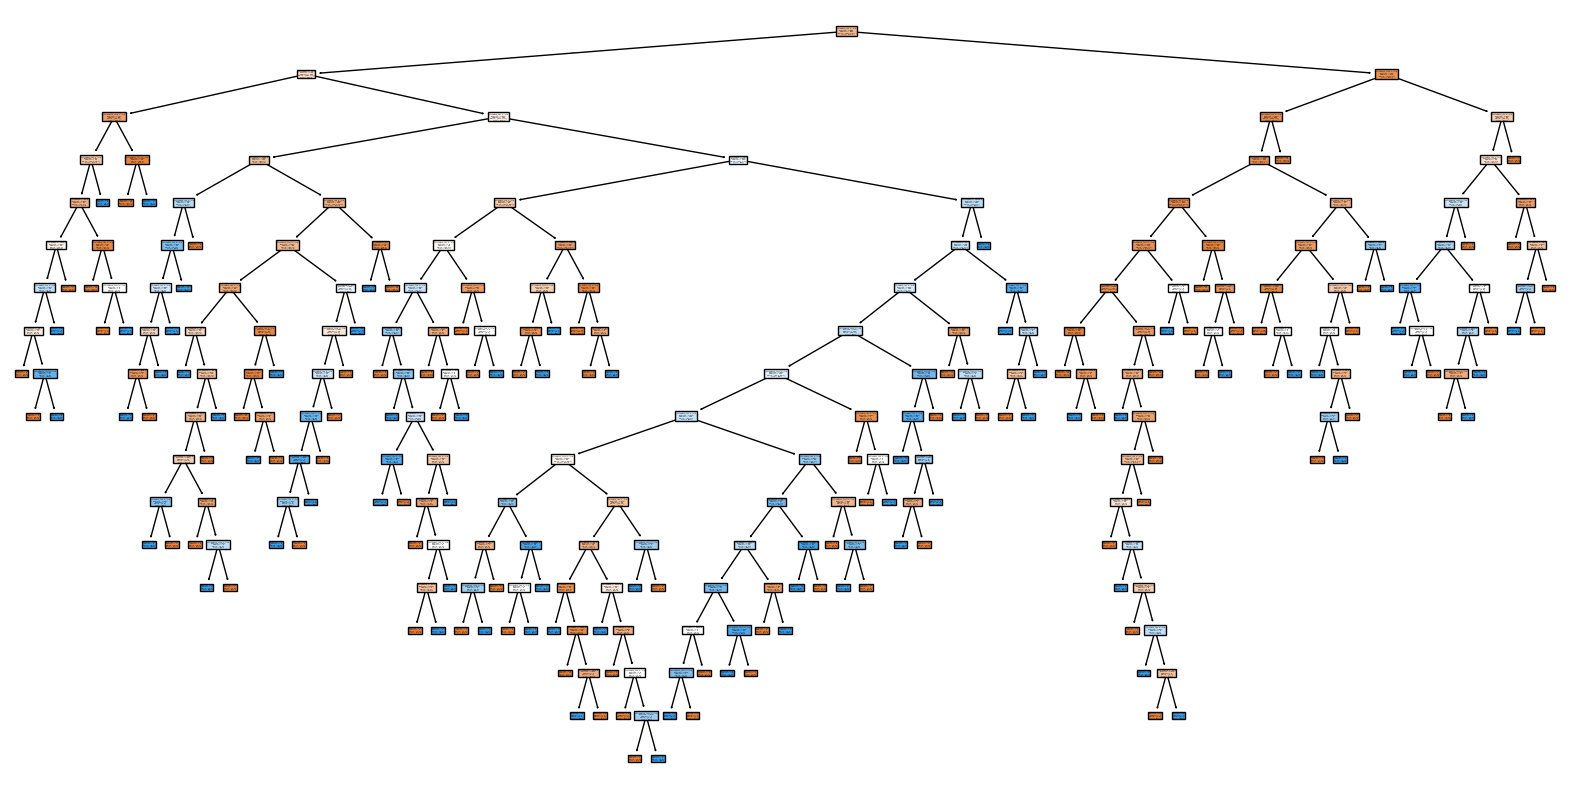

Depth = 2


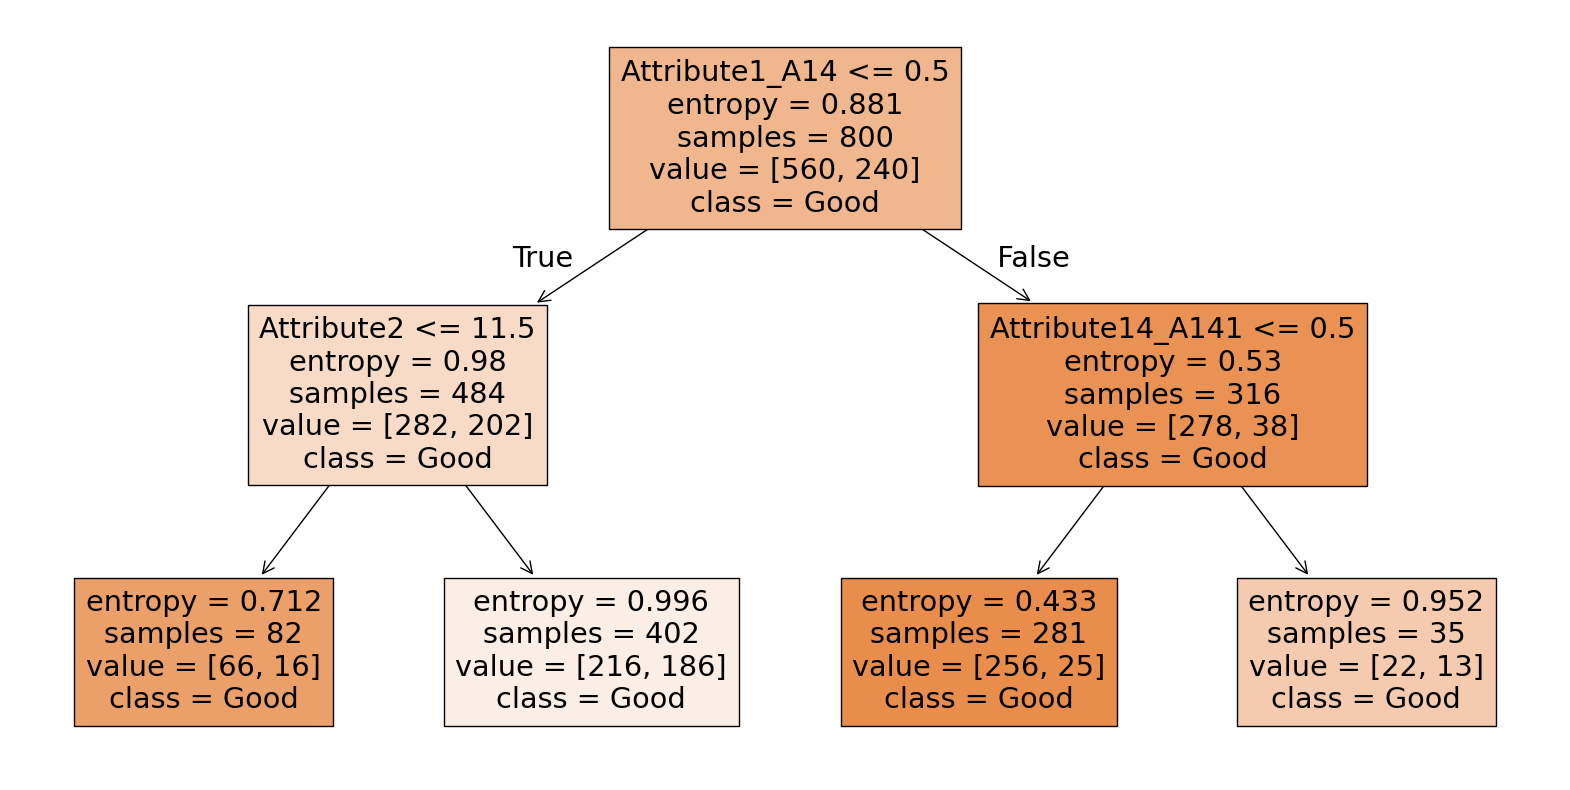

Depth = 3


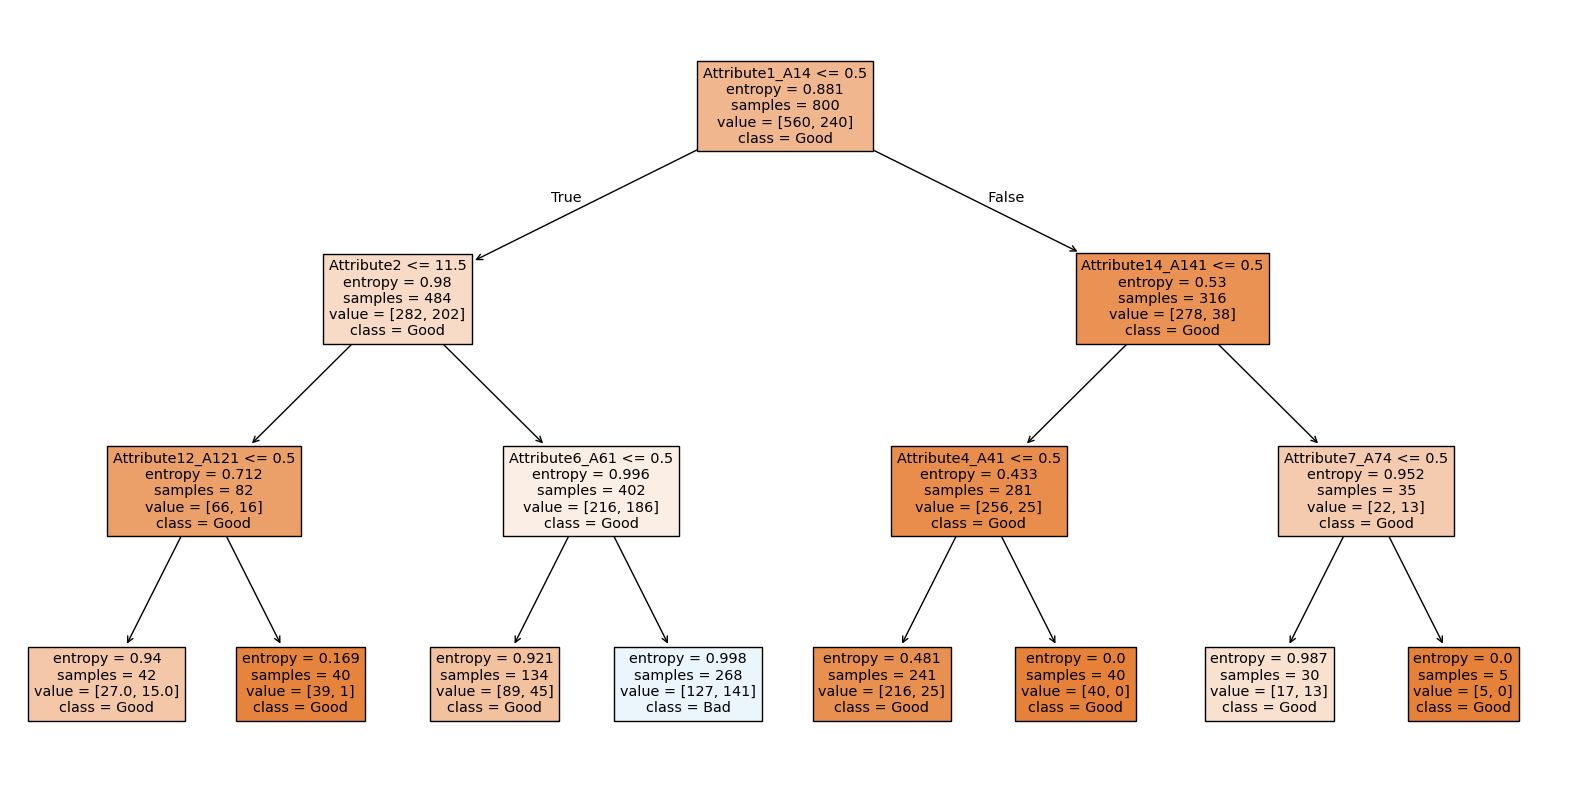

Depth = 4


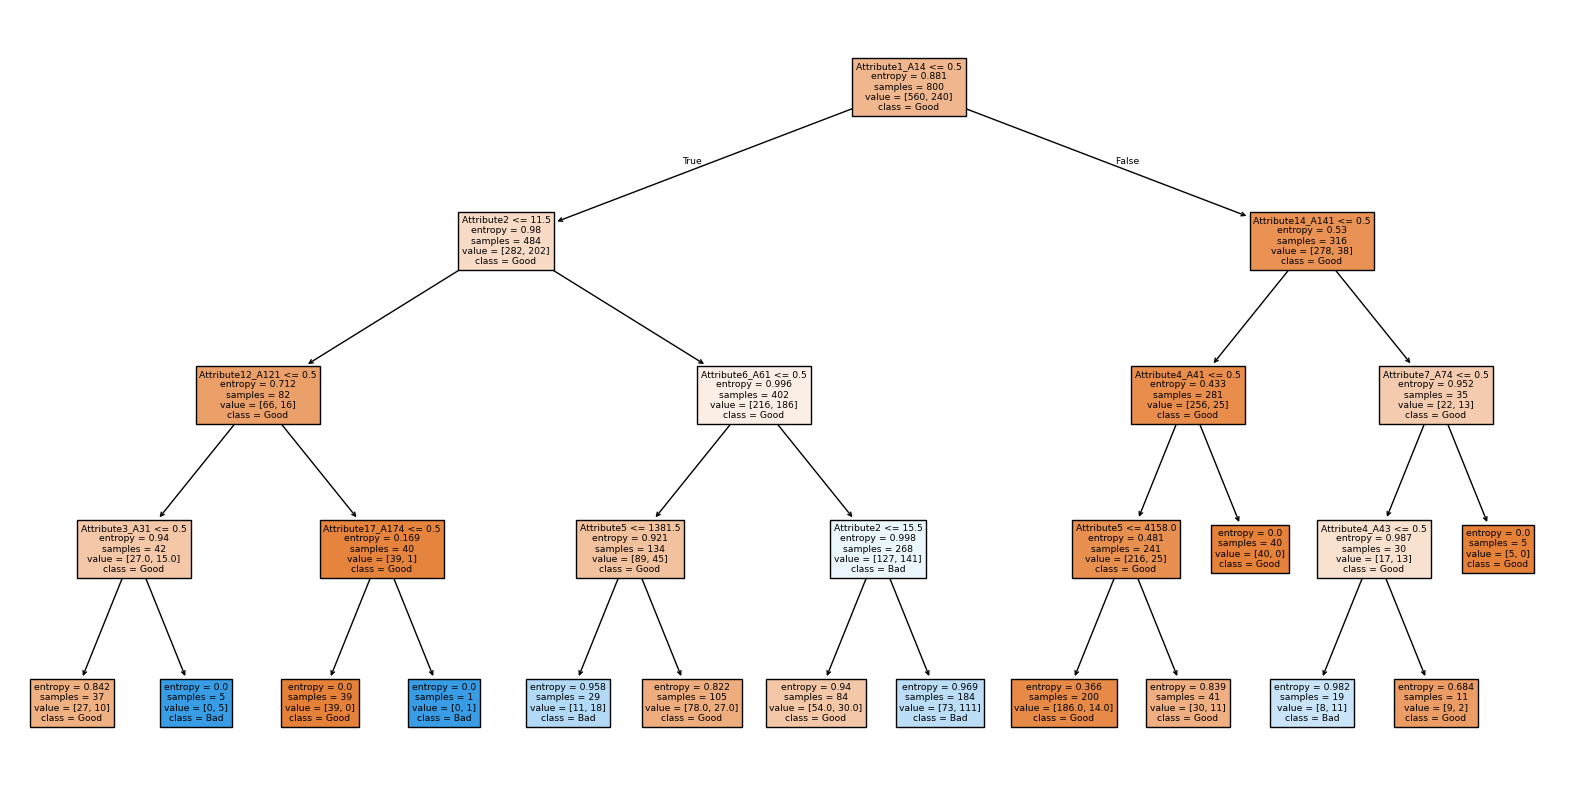

Depth = 5


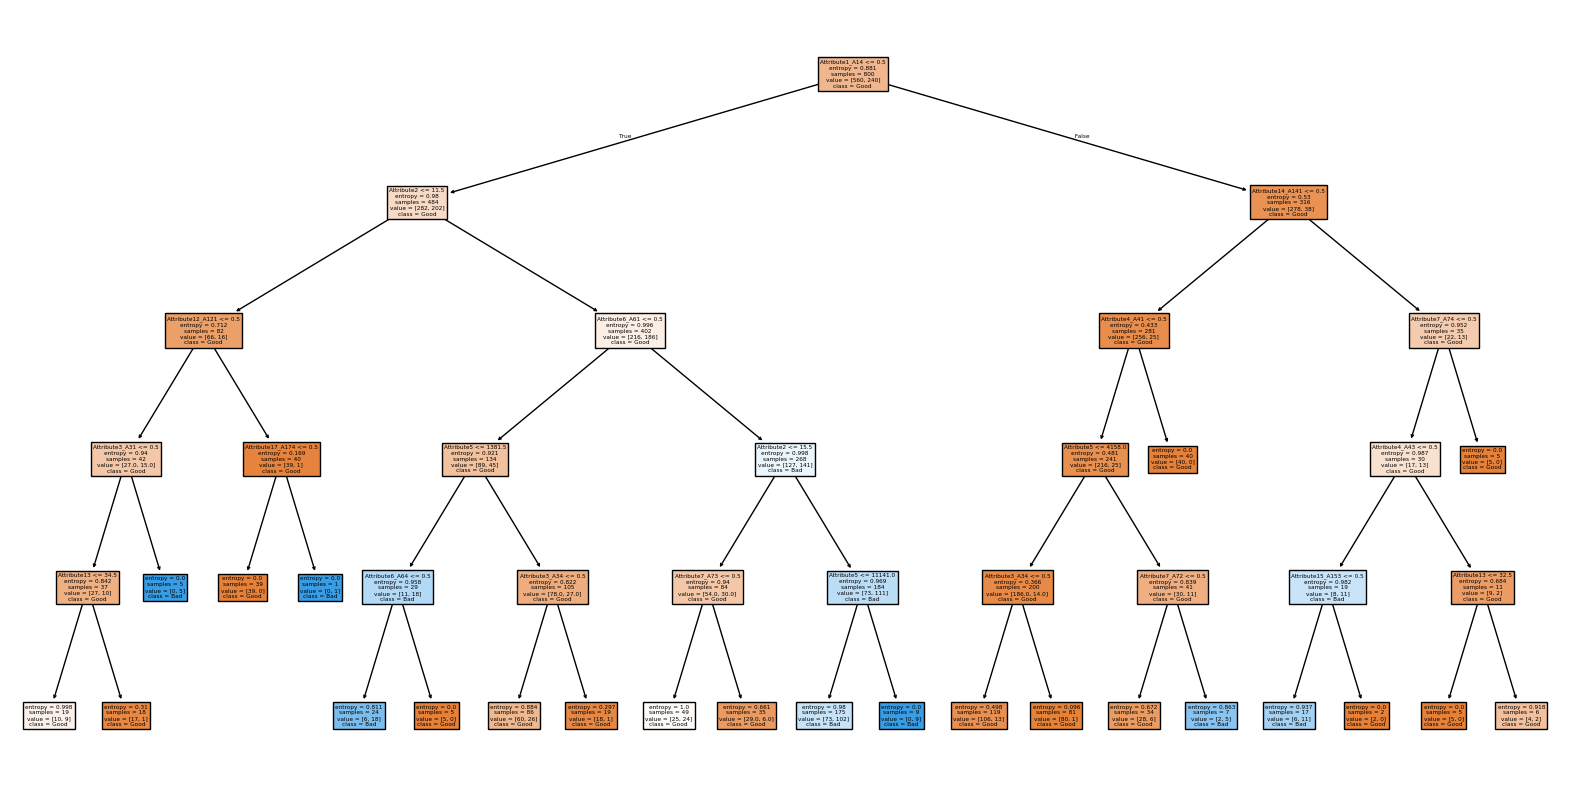

Depth = 6


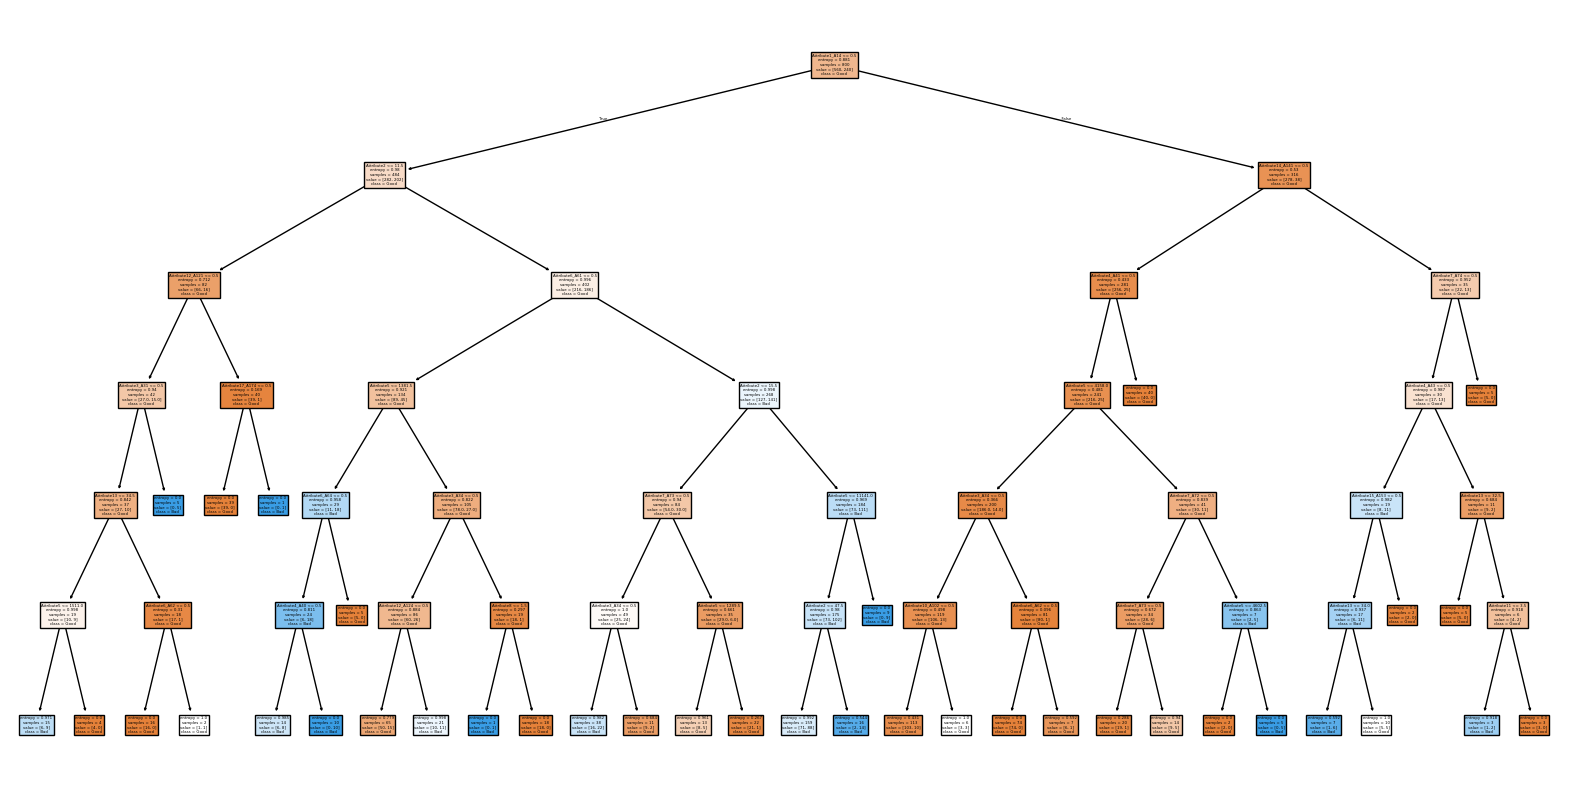

Depth = 7


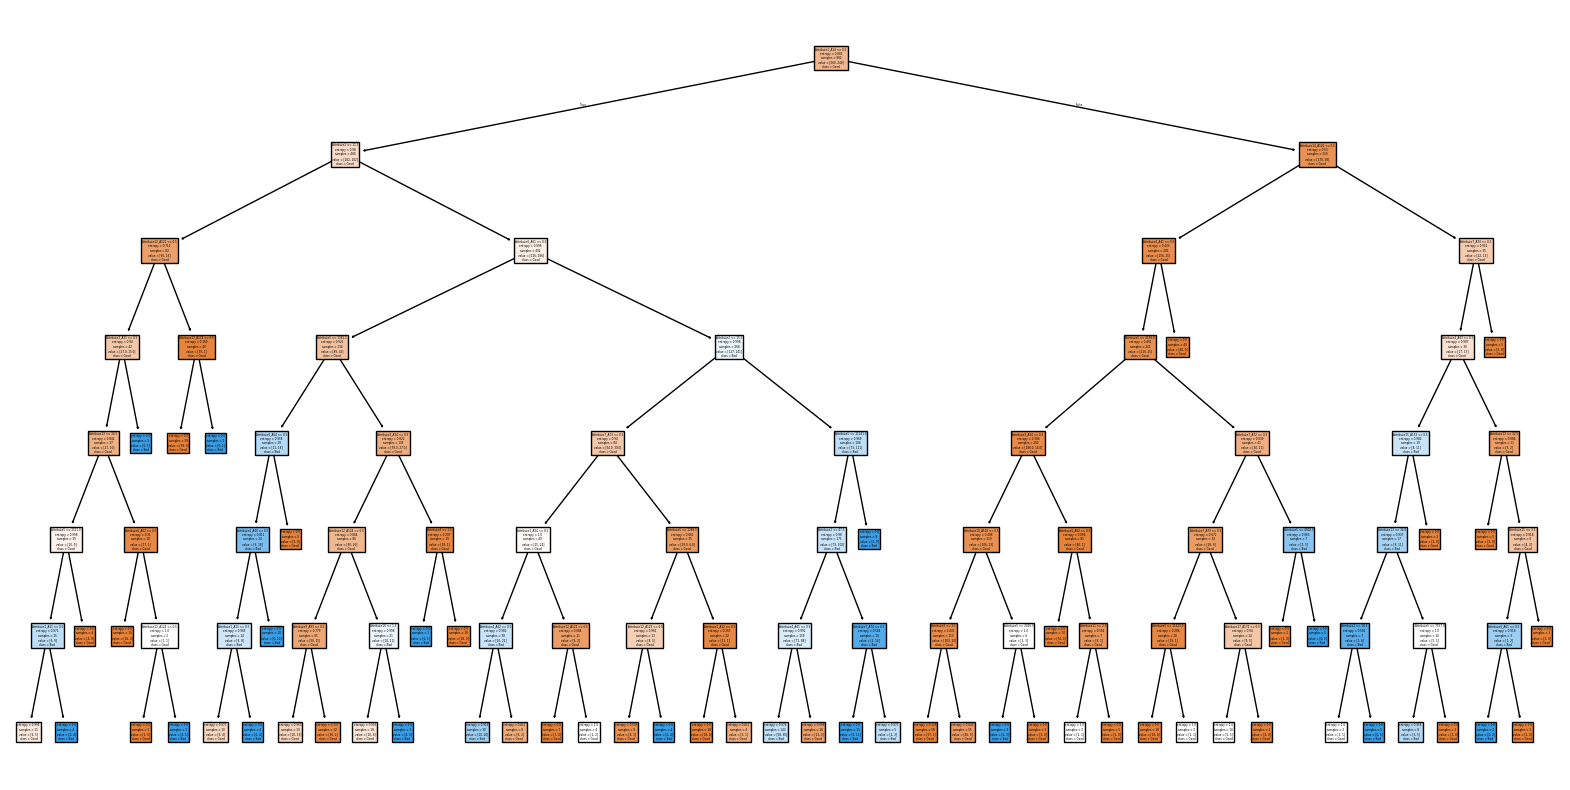

   max_depth  Accuracy
0        NaN     0.670
1        2.0     0.700
2        3.0     0.685
3        4.0     0.660
4        5.0     0.670
5        6.0     0.620
6        7.0     0.655


In [65]:
split_train_test(0.2)

depth_tests = [None, 2, 3, 4, 5, 6, 7]
accuracy = {}

for depth in depth_tests:
    id3 = build_id3(None, depth)
    predictions = evaluate(id3, False)
    accuracy[depth] = accuracy_score(label_test, predictions)

    # Visualize the tree with corresponding depth
    print("Depth =", depth)
    plt.figure(figsize=(20,10))
    tree.plot_tree(id3, feature_names=features_encoded.columns, class_names=["Good", "Bad"], filled=True)
    plt.show()

accuracy_table = pd.DataFrame({'max_depth': depth_tests,
                               'Accuracy': [accuracy[depth] for depth in depth_tests]}) 
print(accuracy_table)

# Charts showing correlation between max depth and accuracy

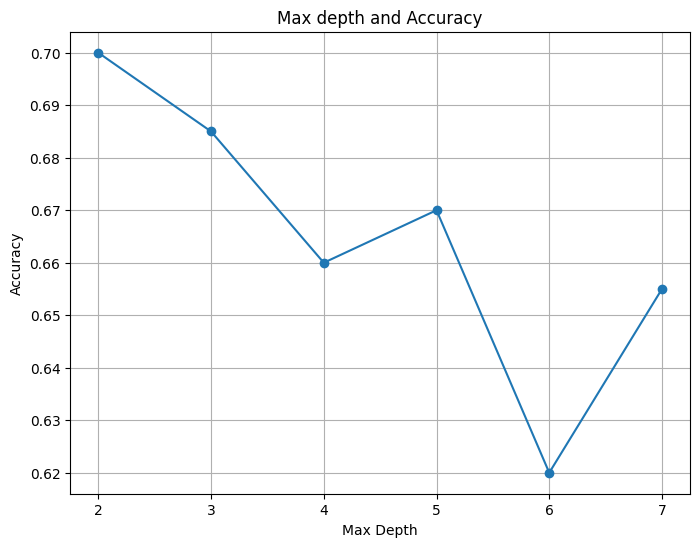

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(depth_tests, [accuracy[depth] for depth in depth_tests], marker='o')
plt.title('Max depth and Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()